# Hito 2 Mineria de datos (cc5205)


Integrantes:

*   Catalina Muñoz O.
*   Javier Andrews G.
*   Javier Venegas M.
*   Luciano Calvo
*   Ulises Faúndez Quinteros




# Indice

# Introduccion

# Limpieza de los datasets


Aqui se detalla el contenido de cada dataset, lo que representa cada columna y con cuales se va a realizar la investigacion.

# Exploracion de datos

In [44]:
#Importacion de librerias para el trabajo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seteamos que pandas imprima todas las columnas al mostrar un dataframe
pd.set_option('display.max_columns', None)

In [45]:
# importanción de anime y users, que son las tablas mas pequeñas
anime = pd.read_csv('anime_cleaned.csv')
users = pd.read_csv('users_cleaned.csv')

In [46]:
# este dataset lo importamos a parte, pues es muy grande (2GB aprox)
animelists = pd.read_csv('animelists_cleaned.csv')

### Tabla animelists

In [47]:
# ordenamos los usuarios por nombre alfabéticamente
animelists = animelists.sort_values(by='username')

# eliminamos usuarios sin nombre
animelists = animelists.dropna(subset=['username'])

# eliminamos las columnas que no usaremos
animelists = animelists.drop(columns=[
    'my_start_date', 'my_finish_date', 'my_tags', 'my_last_updated'
    ])

In [48]:
# mostramos las columnas de animelists luego de la limpieza
animelists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31283787 entries, 6740075 to 6085121
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   username             object 
 1   anime_id             int64  
 2   my_watched_episodes  int64  
 3   my_score             int64  
 4   my_status            int64  
 5   my_rewatching        float64
 6   my_rewatching_ep     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.9+ GB


In [49]:
# mostramos características generales de animelists
animelists.describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep
count,3.128379e+07,3.128379e+07,3.128379e+07,3.128379e+07,2.440557e+07,3.128379e+07
mean,1.170324e+04,1.289617e+01,4.652314e+00,3.008110e+00,7.903113e-04,1.833008e-01
std,1.134843e+04,3.733389e+01,3.931616e+00,1.730421e+00,2.810137e-02,1.009176e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.601000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,8.086000e+03,4.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,1.977500e+04,1.300000e+01,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
max,3.789600e+04,9.999000e+03,1.000000e+01,5.500000e+01,1.000000e+00,5.644513e+06


### Tabla anime

In [50]:
# eliminamos las columnas que no usaremos
anime = anime.drop(columns=[
    'image_url', 'background', 'related', 'premiered', 'broadcast',
    'opening_theme', 'ending_theme', 'title_english', 'title_japanese', 'title_synonyms',
    'airing', 'aired_string', 'licensor'
    ])

# mostramos las columnas de anime luego de la limpieza
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   title            6668 non-null   object 
 2   type             6668 non-null   object 
 3   source           6668 non-null   object 
 4   episodes         6668 non-null   int64  
 5   status           6668 non-null   object 
 6   aired            6668 non-null   object 
 7   duration         6668 non-null   object 
 8   rating           6586 non-null   object 
 9   score            6668 non-null   float64
 10  scored_by        6668 non-null   int64  
 11  rank             6312 non-null   float64
 12  popularity       6668 non-null   int64  
 13  members          6668 non-null   int64  
 14  favorites        6668 non-null   int64  
 15  producer         4402 non-null   object 
 16  studio           6668 non-null   object 
 17  genre         

In [51]:
# mostramos características generales de anime
anime.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
count,6668.000000,6668.000000,6668.000000,6.668000e+03,6312.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6668.000000
mean,15064.977804,14.276395,6.848998,2.403501e+04,4327.645120,4479.515897,4.749037e+04,670.365627,28.442167,2006.915267
std,13161.364001,40.906929,0.927448,6.112103e+04,3170.699074,3453.338080,1.051211e+05,3823.072834,25.365980,10.381425
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.800000e+01,0.000000,0.000000,1942.000000
25%,2592.000000,1.000000,6.350000,6.812500e+02,1710.750000,1691.750000,2.222750e+03,3.000000,17.000000,2003.000000
50%,10401.500000,6.000000,6.930000,3.966000e+03,3754.500000,3629.500000,1.033650e+04,21.000000,24.000000,2010.000000
75%,30301.250000,13.000000,7.460000,1.976075e+04,6338.500000,6630.250000,4.336000e+04,142.000000,27.000000,2015.000000
max,37896.000000,1818.000000,9.520000,1.009477e+06,12856.000000,14468.000000,1.456378e+06,106895.000000,163.000000,2018.000000


### Tabla users

In [52]:
# eliminamos las columnas que no usaremos
users = users.drop(columns=["location", "access_rank"])

# generamos una nueva columna con la edad del usuario calculada con su fecha de nacimiento
users['age'] = 2018 - users['birth_date'].str[:4].astype(int)

# mostramos las columnas de users luego de la limpieza
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   username                  108710 non-null  object 
 1   user_id                   108711 non-null  int64  
 2   user_watching             108711 non-null  int64  
 3   user_completed            108711 non-null  int64  
 4   user_onhold               108711 non-null  int64  
 5   user_dropped              108711 non-null  int64  
 6   user_plantowatch          108711 non-null  int64  
 7   user_days_spent_watching  108711 non-null  float64
 8   gender                    108711 non-null  object 
 9   birth_date                108711 non-null  object 
 10  join_date                 108711 non-null  object 
 11  last_online               108711 non-null  object 
 12  stats_mean_score          108711 non-null  float64
 13  stats_rewatched           108711 non-null  f

In [53]:
# mostramos características generales de users
users.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,stats_mean_score,stats_rewatched,stats_episodes,age
count,1.087110e+05,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000
mean,1.817687e+06,14.767503,196.458178,11.388167,11.733716,75.578589,61.913873,7.747612,14.197993,3779.871255,25.125820
std,1.998269e+06,32.746591,244.945751,30.830825,30.978991,178.653664,59.211762,1.451368,55.376799,3678.336729,4.632399
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.500694,0.000000,0.000000,7.000000,10.000000
25%,1.994345e+05,3.000000,50.000000,0.000000,0.000000,6.000000,21.066319,7.330000,0.000000,1269.500000,22.000000
50%,5.675030e+05,7.000000,123.000000,4.000000,3.000000,27.000000,46.190278,7.890000,1.000000,2797.000000,25.000000
75%,3.477036e+06,16.000000,254.000000,12.000000,12.000000,81.000000,84.461806,8.460000,10.000000,5135.000000,28.000000
max,7.251737e+06,2934.000000,5479.000000,2562.000000,2457.000000,12051.000000,952.654595,10.000000,9404.000000,62347.000000,49.000000


# Consultas sobre el dataset

Procedemos ahora a realizar consultas que nos servirán de apoyo para las preguntas de investigación del proyecto.

### Consulta 1: 10 animes peores evaluados

Filtramos los 10 animes con peor calificación de la lista (distinta de 0), cuyos resultados representamos en un gráfico para estudiarlos mejor.

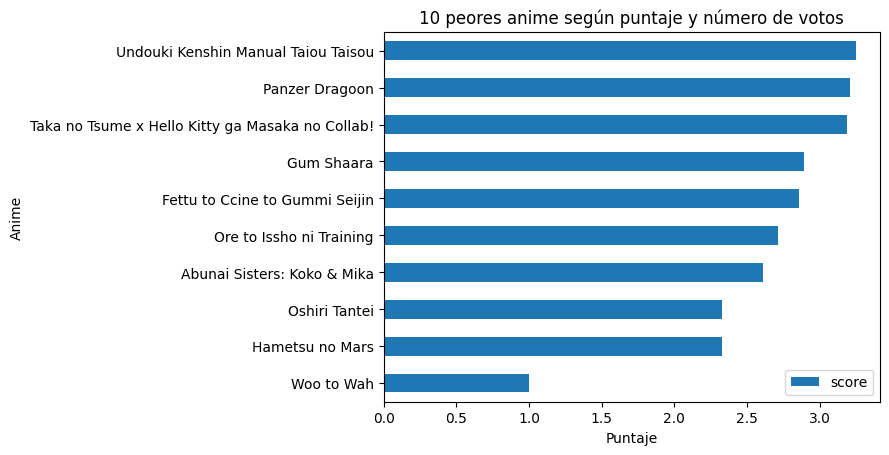

In [42]:
# Ordenamos el dataset según la popularidad:

anime1 = anime[['title','score','scored_by']]
anime1 = anime1[anime1['scored_by'] > 0]
anime_top_des = anime1.sort_values('score', ascending=True)
anime_top_des = anime_top_des.head(10) 

#Graficamos
anime_top_des.plot(x='title', y='score', kind='barh')
plt.title('10 peores anime según puntaje y número de votos')
plt.xlabel('Puntaje')
plt.ylabel('Anime')
plt.show()

Mencionamos también aquellos animes con un puntaje igual a 0, pues si bien puede que no hubiera interés en evaluarlos y por ello el resultado, también cabe la posibilidad de que el valor del puntaje sea a propósito. Por lo que vale la pena estudiarlo más adelante en caso de encontrar alguna similitud en sus características con aquellos animes del gráfico anterior.

In [54]:
anime1 = anime[['title','score','scored_by']]
anime1 = anime1[anime1['scored_by'] == 0]
anime_top_des = anime1.sort_values('score', ascending=True)
anime_top_des = anime_top_des.head(10) 

print(anime_top_des)

                                                  title  score  scored_by
6640     Inazuma Eleven Reloaded: Reformation of Soccer    0.0          0
6644    Free!: Take Your Marks: Character Butai Aisatsu    0.0          0
6648  Free! Movie 2: Timeless Medley - Yakusoku: Cha...    0.0          0
6652  Free! Movie 1: Timeless Medley - Kizuna: Chara...    0.0          0
6661                             Chikyuu to no Yakusoku    0.0          0
6664                        Wo Shi Jiang Xiaobai (2018)    0.0          0


### Consulta 2: Géneros de anime más y menos populares

Ordenamos en un gráfico 20 primero conjuntos de géneros de anime según su popularidad, los resultados los ordenaremos de más a menos populares. Esto nos puede ayudar a visualizar mejor la tendencia de los espectadores a la hora de escoger ver algo nuevo.

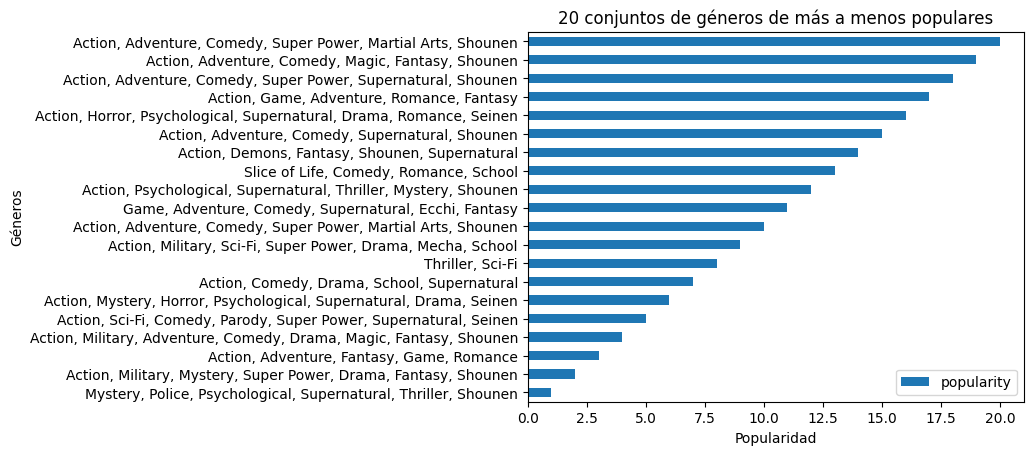

In [66]:

anime2 = anime[['title','genre','popularity']]
anime_top_des = anime2.sort_values('popularity', ascending=True)
anime_top_des = anime_top_des.head(20) 


#Graficamos
anime_top_des.plot(x='genre', y='popularity', kind='barh')
plt.title('20 conjuntos de géneros de más a menos populares')
plt.xlabel('Popularidad')
plt.ylabel('Géneros')
plt.show()

### Consulta 3: Animes más abandonados

Ahora buscamos los animes que tienden a ser abandonados, esto con el objetivo de servir de apoyo para futuras preguntas de investigación. Para esto vamos a verificar si existe alguna relación entre los 20 animes más abandonados y los 3 conjuntos de géneros menos populares del gráfico de la consulta anterior. 

In [67]:
#Data frame con animes más abandonados

anime_dropped = animelists[['anime_id', 'my_status']] #proyeccion sobre datos significativos
anime_dropped = anime_dropped[anime_dropped['my_status'] == 4] #Dejamos solo los abandonados
count_dropped = anime_dropped['anime_id'].value_counts(dropna=True, sort=True) #Contamos las repeticiones del id
count_dropped = count_dropped.rename_axis('anime_id').to_frame('counts') #Convertimos en un dataframe
anime_names = anime[['title','anime_id','score','genre', 'episodes']]
count_dropped = count_dropped.merge(anime_names, on='anime_id', how='inner') #Obtenemos los nombres a partir del id
count_dropped.head(20) # Tomamos los primeros 20

,anime_id,counts,title,score,genre,episodes
0,269,11807,Bleach,7.90,"Action, Adventure, Comedy, Super Power, Supern...",366
1,1735,9424,Naruto: Shippuuden,8.18,"Action, Adventure, Comedy, Super Power, Martia...",500
2,20,7247,Naruto,7.88,"Action, Adventure, Comedy, Super Power, Martia...",220
3,21,6696,One Piece,8.54,"Action, Adventure, Comedy, Super Power, Drama,...",0
4,6702,6094,Fairy Tail,8.08,"Action, Adventure, Comedy, Magic, Fantasy, Sho...",175
5,527,4120,Pokemon,7.42,"Action, Adventure, Comedy, Kids, Fantasy",276
6,249,3748,InuYasha,7.90,"Action, Adventure, Comedy, Historical, Demons,...",167
7,1887,3371,Lucky☆Star,7.83,"Slice of Life, Comedy, Parody, School",24
8,1482,3199,D.Gray-man,8.16,"Action, Adventure, Comedy, Super Power, Demons...",103
9,3588,3127,Soul Eater,8.03,"Action, Fantasy, Comedy, Supernatural, Shounen",51


Podemos observar que de estos resultados solo 2 de estos animes coinciden con los géneros menos populares vistos anteriormente. Por lo que concluimos no hay relación entre el género de un anime con el hecho de si serán abandonados o no por los espectadores.

### Consulta 4: 100 estudios menos populares.

Buscamos ahora los 100 animes menos populares y buscamos los estudios de animación japonesa que más se repitan entre ellos. 

Aquí veremos cuales estudios producen los animes menos populares, lo cual nos podría ayudar a identificar patrones que nos servirán a furutos análisis.

Text(0, 0.5, 'Estudio')

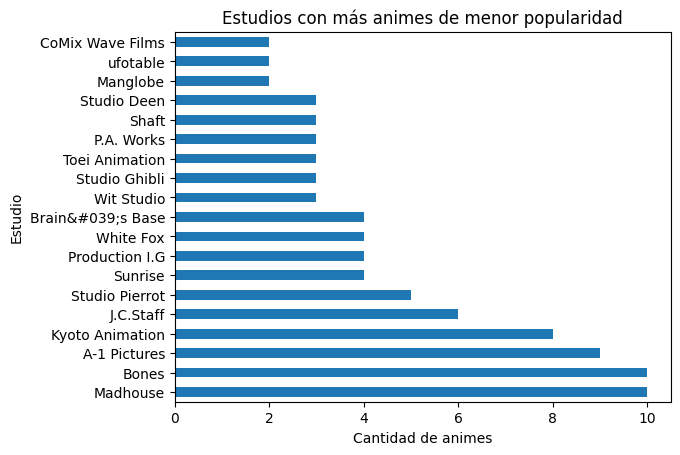

In [75]:
# Buscamos los estudios de los 100 animes menos populares

anime = anime.sort_values('popularity', ascending=True)
anime_top100 = anime.head(100)
anime_top100 = anime_top100['studio'].value_counts()
anime_top100[anime_top100 > 1].plot(kind='barh')

# Gráfico de los estudios con más animes de menor popularidad

plt.title('Estudios con más animes de menor popularidad')
plt.xlabel('Cantidad de animes')
plt.ylabel('Estudio')

# Preguntas y problemas

Nos planteamos variadas preguntas inspiradas en las consultas ya realizadas:

1. ¿Podemos identificar los géneros de anime más populares entre distintas edades de usuarios?

Esto nos puede ayudar a predecir qué tipo de anime podría preferir una cierta audiencia, lo cual nos sirve como apoyo para determinar si un anime podría llegar a fracasar en el mercado.

2. ¿Tiene alguna influencia la ubicación geográfica en la popularidad de un género?

Esta pregunta nos podría ayudar a entender mejor las preferencias de los usuarios según las características del mismo y, tal vez, un factor cultural relacionado con la ubicación geográfica. Pues, por ejemplo, un anime altamente religioso en su trama puede ser un éxito en ciertos países que comparten la fe y a la vez ser un total fracaso en otros con una población más bien atea.

3. ¿Tiene relación la cantidad de episodios de un anime con su popularidad?

Es curioso que animes con tantos episodios, como por ejemplo One Piece o Naruto, sean tan populares hoy en día cuando otras veces mientras más se extiende la trama, peor se vuelve y termina abandonado por la audiencia. Por lo que es interesante estudiar si la cantidad de episodios puede influir en la fidelidad de los espectadores o no.

4. ¿Podemos encontrar algún patrón con el cual identificar si un anime tiene más probabilidad de fracaso que otros? 

Es decir, el objetivo es identificar si es más probable que dejen de ver cierto anime en base a sus características. Este terminará siendo el foco de nuestro proyecto, de lo cual nos apoyaremos tanto de las consultas realizadas como de las demás preguntas de investigación ya planteadas.

# Propuesta experimental

# Respondiendo la pregunta 1 usando el metodo experimental

algoritmo 1

algoritmo 2

algoritmo 3

# Resultados


# Contribucion de cada integrante